In [38]:
import pymc3 as pm
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

start = datetime.datetime(2008,5,1)
end = datetime.datetime(2009,12,31)
returns = web.DataReader('SPY', 'yahoo', start=start, end=end)['Close'].pct_change()

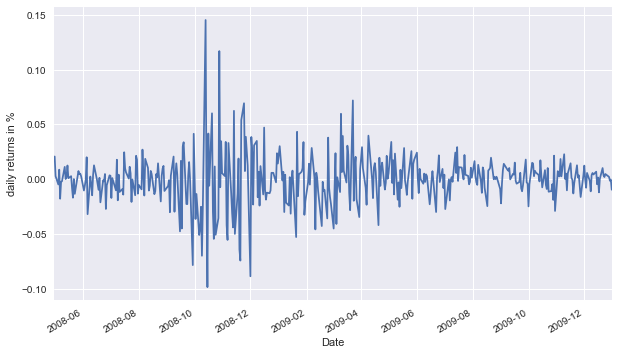

In [27]:
returns.plot(figsize=(10, 6))
plt.ylabel('daily returns in %')

In [29]:
with pm.Model() as sp500_model:
    nu = pm.Exponential('nu', 0.1, testval=5)
    sigma = pm.Exponential('sigma', 50, testval=0.1)
    
    s = pm.GaussianRandomWalk('s', sigma**-2, shape=len(returns))
    volatility_process = pm.Deterministic('volatility_process', pm.math.exp(-2*s))
    
    r = pm.StudentT('r', nu, lam=1/volatility_process, observed=returns)

In [33]:
with sp500_model:
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = 951.84: 100%|█████████| 200000/200000 [01:10<00:00, 2821.88it/s]
Finished [100%]: Average ELBO = 951.49
100%|██████████████████████████████████████| 2000/2000 [05:30<00:00,  6.05it/s]


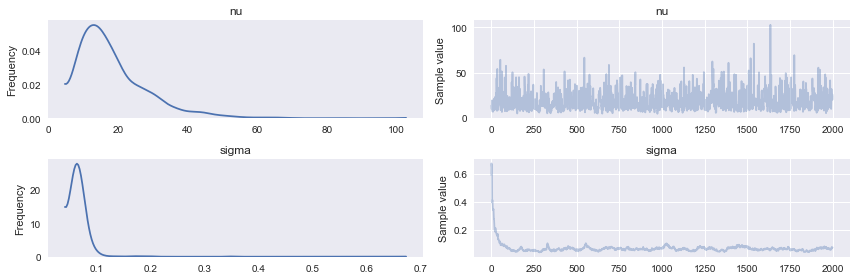

In [86]:
pm.traceplot(trace, [nu, sigma])
plt.show()

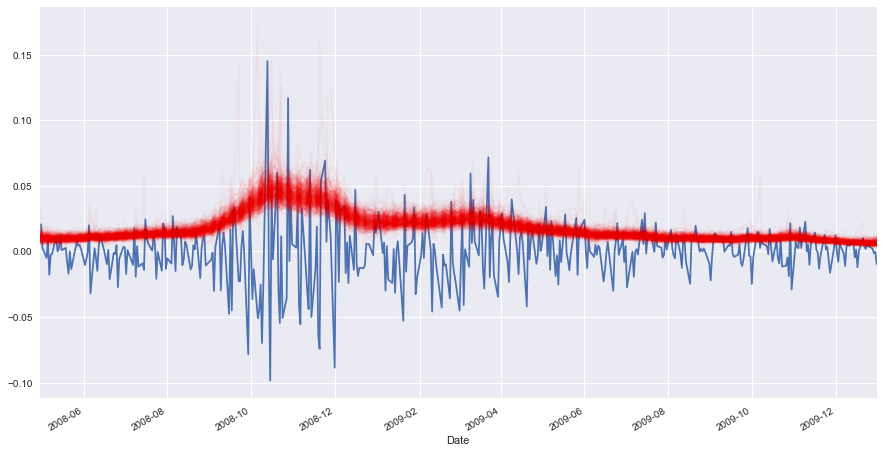

In [43]:
fig, ax = plt.subplots(figsize=(15, 8))
returns.plot(ax=ax)
ax.plot(returns.index, 1/np.exp(trace['s',::5].T), 'r', alpha=0.03)
plt.show()

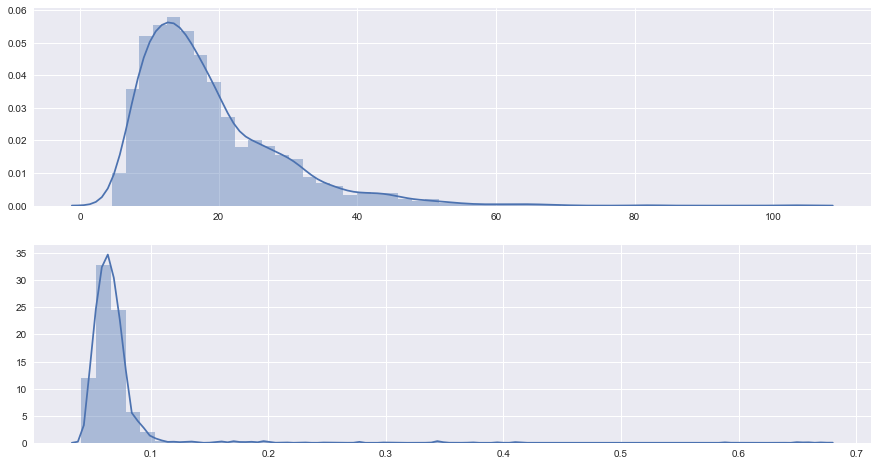

In [76]:
fig, ax = plt.subplots(2,1,figsize=(15, 8))
sns.distplot(trace['nu'], ax=ax[0])
sns.distplot(trace['sigma'], ax=ax[1])